Importing relevant functionalities

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import seaborn as sns
from scipy.stats import kde
from pandas import DataFrame as df
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

Preparing plots

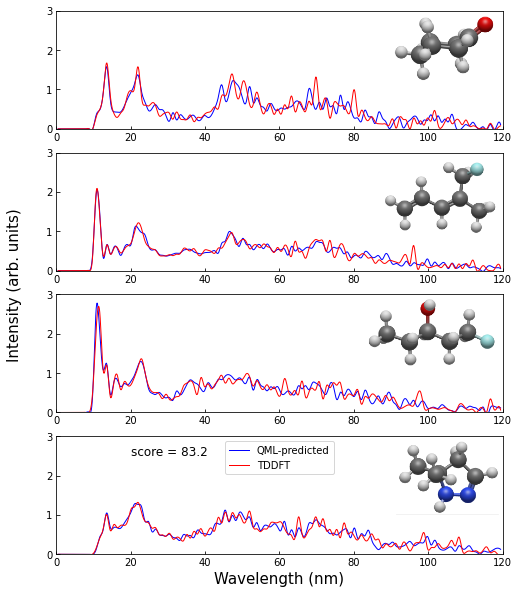

In [10]:
M7382 = {}
M3936 = {}
M3843 = {}
M3719 = {}
M7382 = pd.read_csv('../csv_files/reconstructed_7382.csv',header=0)
M3936 = pd.read_csv('../csv_files/reconstructed_3936.csv',header=0)
M3843 = pd.read_csv('../csv_files/reconstructed_3843.csv',header=0)
M3719 = pd.read_csv('../csv_files/reconstructed_3719.csv',header=0)

dx=120.0/128.0
x=np.zeros(128)
for i in range(0,128):
    x[i]=i*dx+dx/2
    
dx=(119.53125-0.46875)/1000.0
x_grids=np.zeros(1000)
for i in range(0,1000):
    x_grids[i]=0.46875+i*dx+dx/2
    
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
def place_image(im, loc=3, ax=None, zoom=1, **kw):
    if ax==None: ax=plt.gca()
    imagebox = OffsetImage(im, zoom=zoom*0.72)
    ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False, **kw)
    ax.add_artist(ab)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
fig.text(0.04, 0.5, 'Intensity (arb. units)', va='center', rotation='vertical',fontsize=15)

ax[0].tick_params(direction="in",which='both')
ax[0].set_xlim([0,120])
ax[0].set_ylim([0,3.0])
ax[1].set_xticks(x,minor=False)
ax[1].tick_params(direction="in",which='both')
ax[1].set_xlim([0,120])
ax[1].set_ylim([0,3.0])
ax[2].set_xticks(x,minor=False)
ax[2].tick_params(direction="in",which='both')
ax[2].set_xlim([0,120])
ax[2].set_ylim([0,3.0])
ax[3].set_xticks(x,minor=False)
ax[3].tick_params(direction="in",which='both')
ax[3].set_xlim([0,120])
ax[3].set_ylim([0,3.0])

from scipy import interpolate

f=interpolate.interp1d(x, M7382.predicted, kind='cubic')
M7382_pred_int=f(x_grids)
f=interpolate.interp1d(x, M7382.tddft, kind='cubic')
M7382_tddft_int=f(x_grids)

ax[0].set_xticks(x,minor=False)
ax[0].plot(x_grids, M7382_pred_int[:]*54, label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
ax[0].plot(x_grids, M7382_tddft_int[:]*54, label='TDDFT',color='red',zorder=3,linewidth=1.0)
im = image.imread('../csv_files/7382.png')
place_image(im, loc=1, ax=ax[0], pad=0, zoom=0.75)
start, end = ax[0].get_xlim()
ax[0].xaxis.set_ticks(np.arange(start, end+10, 20))

f=interpolate.interp1d(x, M3936.predicted, kind='cubic')
M3936_pred_int=f(x_grids)
f=interpolate.interp1d(x, M3936.tddft, kind='cubic')
M3936_tddft_int=f(x_grids)

ax[1].plot(x_grids, M3936_pred_int[:]*54, label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
ax[1].plot(x_grids, M3936_tddft_int[:]*54, label='TDDFT',color='red',zorder=3,linewidth=1.0)
im = image.imread('../csv_files/3936.png')
place_image(im, loc=1, ax=ax[1], pad=0, zoom=0.75)
start, end = ax[1].get_xlim()
ax[1].xaxis.set_ticks(np.arange(start, end+10, 20))

f=interpolate.interp1d(x, M3843.predicted, kind='cubic')
M3843_pred_int=f(x_grids)
f=interpolate.interp1d(x, M3843.tddft, kind='cubic')
M3843_tddft_int=f(x_grids)

ax[2].plot(x_grids, M3843_pred_int[:]*63, label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
ax[2].plot(x_grids, M3843_tddft_int[:]*63, label='TDDFT',color='red',zorder=3,linewidth=1.0)
ax[2].text(20,2.5, 'score = 83.2', fontsize = 12)
im = image.imread('../csv_files/3843.png')
place_image(im, loc=1, ax=ax[2], pad=0, zoom=0.75)
start, end = ax[2].get_xlim()
ax[2].xaxis.set_ticks(np.arange(start, end+10, 20))

f=interpolate.interp1d(x, M3719.predicted, kind='cubic')
M3719_pred_int=f(x_grids)
f=interpolate.interp1d(x, M3719.tddft, kind='cubic')
M3719_tddft_int=f(x_grids)

ax[3].plot(x_grids, M3719_pred_int[:]*61, label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
ax[3].plot(x_grids, M3719_tddft_int[:]*61, label='TDDFT',color='red',zorder=3,linewidth=1.0)
ax[3].text(20,2.5, 'score = 83.2', fontsize = 12)
im = image.imread('../csv_files/3719.png')
place_image(im, loc=1, ax=ax[3], pad=0, zoom=0.75)
start, end = ax[3].get_xlim()
ax[3].xaxis.set_ticks(np.arange(start, end+10, 20))
ax[3].legend(frameon=True, loc='upper center',ncol=1)
plt.xlabel('Wavelength (nm)', fontsize = 15)
plt.savefig("reconstruction_SVPD.pdf",bbox_inches='tight')